# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Condition-Number" data-toc-modified-id="Condition-Number-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Condition Number</a></div><div class="lev2 toc-item"><a href="#Implementation" data-toc-modified-id="Implementation-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation</a></div><div class="lev2 toc-item"><a href="#Longley-example" data-toc-modified-id="Longley-example-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Longley example</a></div><div class="lev2 toc-item"><a href="#Further-reading" data-toc-modified-id="Further-reading-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Further reading</a></div>

# Condition Number

* Assume $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and consider the system of linear equation 
$$
\mathbf{A} \mathbf{x} = \mathbf{b}.
$$
The solution is 
$$
\mathbf{x} = \mathbf{A}^{-1}  \mathbf{b}.
$$
We want to know how the solution changes with a small perturbation of the input $\mathbf{b}$ (or $\mathbf{A}$).

* Let 
$$
\mathbf{b}_{\text{new}} = \mathbf{b} + \Delta \mathbf{b}.
$$
Then 
$$
\mathbf{x}_{\text{new}} = \mathbf{A}^{-1} (\mathbf{b} + \Delta \mathbf{b}) = \mathbf{x} + \Delta \mathbf{x}.
$$
Thus 
$$
\|\Delta \mathbf{x}\| = \|\mathbf{A}^{-1} \Delta \mathbf{b}\| \le \|\mathbf{A}^{-1}\| \|\Delta \mathbf{b}\|.
$$
Because $\mathbf{b} = \mathbf{A} \mathbf{x}$, 
$$
\frac{1}{\|\mathbf{x}\|} \le \|\mathbf{A}\| \frac{1}{\|\mathbf{b}\|}.
$$
This results 
$$
\frac{ \|\Delta \mathbf{x}\|}{\|\mathbf{x}\|} \le \|\mathbf{A}\|\|\mathbf{A}^{-1}\| \frac{\|\Delta \mathbf{b}\|}{\|\mathbf{b}\|}.
$$

* $\kappa(\mathbf{A}) = \|\mathbf{A}\| \|\mathbf{A}^{-1}\|$ is called the **condition number for linear equation**. It depends on the matrix norm being used.  
    * $\kappa_p$ means condition number defined from matrix-$p$ norm.

* Large condition number means "bad".

* Some facts:  
$$
\begin{eqnarray*}
\kappa(\mathbf{A}) &=& \kappa(\mathbf{A}^{-1})	\\
\kappa(c\mathbf{A}) &=& \kappa(\mathbf{A})	\\
\kappa(\mathbf{A}) &\ge& 1	\\
%\kappa_1(\mathbf{A}) &=& \kappa_\infty (\mathbf{A}^T)	\\
\kappa_2 (\mathbf{A}) &=& \kappa_2 (\mathbf{A}^T) = \frac{\sigma_1(\mathbf{A})}{\sigma_n(\mathbf{A})}	\\
\kappa_2(\mathbf{A}^T \mathbf{A}) &=& \frac{\lambda_1(\mathbf{A}^T \mathbf{A})}{\lambda_n(\mathbf{A}^T \mathbf{A})} =  \kappa_2^2(\mathbf{A}) \ge \kappa_2(\mathbf{A}).
\end{eqnarray*}
$$
The last fact says that the condition number of $\mathbf{A}^T \mathbf{A}$ can be much larger than that of $\mathbf{A}$.

* The smallest singular value $\sigma_n$ indicates the _distance to the trouble_.

* **Condition number for the least squares problem** is more complicated. Roughly speaking, 
    - the method based on normal equation (Cholesky, sweep) has a condition depending on $[\kappa_2(\mathbf{X})]^2$ 
    - QR for a _small residuals_ least squares problem has a condition depending on $\kappa_2(\mathbf{X})$
    
* Consider the simple case
$$
\begin{eqnarray*}
	\mathbf{X} = \begin{pmatrix}
	1 & 1 \\
	10^{-3} & 0 \\
	0 & 10^{-3}
	\end{pmatrix}.
\end{eqnarray*}
$$
Forming normal equation yields a singular Gramian matrix
$$
\begin{eqnarray*}
	\mathbf{X}^T \mathbf{X} = \begin{pmatrix}
	1 & 1 \\
	1 & 1
	\end{pmatrix}
\end{eqnarray*}
$$
if executed with a precision of 6 decimal digits.

## Implementation

* Julia function [`cond`](https://docs.julialang.org/en/stable/stdlib/linalg/#Base.LinAlg.cond) computes $\kappa_p$ for $p=1$, 2 (default), or $\infty$.

* Julia function [`condskeel`](https://docs.julialang.org/en/stable/stdlib/linalg/#Base.LinAlg.condskeel) computes the Skeel condition number.

## Longley example

The [Longley (1967)](https://www.jstor.org/stable/2283673?seq=1#page_scan_tab_contents) macroeconomic data set is a famous test example for numerical software in early dates.

In [1]:
using Requests

longleyurl = get("http://hua-zhou.github.io/teaching/biostatm280-2018spring/slides/13-cond/longley.txt")
longley = readdlm(IOBuffer(longleyurl.data))

16×7 Array{Float64,2}:
 60323.0   83.0  234289.0  2356.0  1590.0  107608.0  1947.0
 61122.0   88.5  259426.0  2325.0  1456.0  108632.0  1948.0
 60171.0   88.2  258054.0  3682.0  1616.0  109773.0  1949.0
 61187.0   89.5  284599.0  3351.0  1650.0  110929.0  1950.0
 63221.0   96.2  328975.0  2099.0  3099.0  112075.0  1951.0
 63639.0   98.1  346999.0  1932.0  3594.0  113270.0  1952.0
 64989.0   99.0  365385.0  1870.0  3547.0  115094.0  1953.0
 63761.0  100.0  363112.0  3578.0  3350.0  116219.0  1954.0
 66019.0  101.2  397469.0  2904.0  3048.0  117388.0  1955.0
 67857.0  104.6  419180.0  2822.0  2857.0  118734.0  1956.0
 68169.0  108.4  442769.0  2936.0  2798.0  120445.0  1957.0
 66513.0  110.8  444546.0  4681.0  2637.0  121950.0  1958.0
 68655.0  112.6  482704.0  3813.0  2552.0  123366.0  1959.0
 69564.0  114.2  502601.0  3931.0  2514.0  125368.0  1960.0
 69331.0  115.7  518173.0  4806.0  2572.0  127852.0  1961.0
 70551.0  116.9  554894.0  4007.0  2827.0  130081.0  1962.0

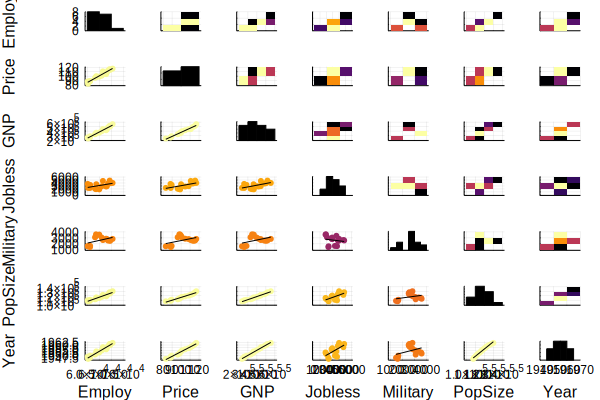

In [2]:
using StatPlots
gr()

corrplot(longley, 
    label = ["Employ" "Price" "GNP" "Jobless" "Military" "PopSize" "Year"])

In [3]:
# response: Employment
y = longley[:, 1]
# predictor matrix
X = [ones(length(y)) longley[:, 2:end]]

16×7 Array{Float64,2}:
 1.0   83.0  234289.0  2356.0  1590.0  107608.0  1947.0
 1.0   88.5  259426.0  2325.0  1456.0  108632.0  1948.0
 1.0   88.2  258054.0  3682.0  1616.0  109773.0  1949.0
 1.0   89.5  284599.0  3351.0  1650.0  110929.0  1950.0
 1.0   96.2  328975.0  2099.0  3099.0  112075.0  1951.0
 1.0   98.1  346999.0  1932.0  3594.0  113270.0  1952.0
 1.0   99.0  365385.0  1870.0  3547.0  115094.0  1953.0
 1.0  100.0  363112.0  3578.0  3350.0  116219.0  1954.0
 1.0  101.2  397469.0  2904.0  3048.0  117388.0  1955.0
 1.0  104.6  419180.0  2822.0  2857.0  118734.0  1956.0
 1.0  108.4  442769.0  2936.0  2798.0  120445.0  1957.0
 1.0  110.8  444546.0  4681.0  2637.0  121950.0  1958.0
 1.0  112.6  482704.0  3813.0  2552.0  123366.0  1959.0
 1.0  114.2  502601.0  3931.0  2514.0  125368.0  1960.0
 1.0  115.7  518173.0  4806.0  2572.0  127852.0  1961.0
 1.0  116.9  554894.0  4007.0  2827.0  130081.0  1962.0

In [4]:
# Julia function for obtaining condition number
cond(X)

4.859257015454868e9

In [5]:
# what's the implementation?
@which cond(X)

cond(A::AbstractArray{T,2} where T) in Base.LinAlg at linalg/dense.jl:911

In [6]:
# we see the smallest singular value (aka trouble number) is very small
xsvals = svdvals(X)

7-element Array{Float64,1}:
     1.66367e6  
 83899.6        
  3407.2        
  1582.64       
    41.6936     
     3.64809    
     0.000342371

In [7]:
# condition number of the design matrix
xcond = maximum(xsvals) / minimum(xsvals)

4.859257015454868e9

In [8]:
# X is full rank from SVD
xrksvd = rank(X)

7

In [9]:
@which rank(X)

rank(A::AbstractArray{T,2} where T) in Base.LinAlg at linalg/generic.jl:723

In [10]:
# least squares from QR
X \ y

7-element Array{Float64,1}:
   -3.48226e6
   15.0619   
   -0.0358192
   -2.02023  
   -1.03323  
   -0.0511041
 1829.15     

In [11]:
# Gram matrix
G = X'X

7×7 Array{Float64,2}:
    16.0        1626.9        6.20318e6   …  1.87878e6  31272.0       
  1626.9           1.67172e5  6.46701e8      1.9214e8       3.18054e6 
     6.20318e6     6.46701e8  2.55315e12     7.3868e11      1.21312e10
 51093.0           5.28908e6  2.06505e10     6.06649e9      9.99059e7 
 41707.0           4.29317e6  1.66329e10     4.92386e9      8.15371e7 
     1.87878e6     1.9214e8   7.3868e11   …  2.2134e11      3.67258e9 
 31272.0           3.18054e6  1.21312e10     3.67258e9      6.11215e7 

In [12]:
# rank of Gram matrix from SVD
# rank deficient!
rank(G)

6

In [13]:
svdvals(G)

7-element Array{Float64,1}:
    2.76779e12
    7.03914e9 
    1.1609e7  
    2.50476e6 
 1738.36      
   13.3086    
    1.16099e-7

In [14]:
# rank of Gram matrix from cholesky
# full!
gchol = cholfact(G, :L, Val{true})
rank(gchol)

7

In [15]:
# least squares solution from Cholesky matches those from QR
gchol \ (X'y)

7-element Array{Float64,1}:
   -3.48226e6
   15.0619   
   -0.0358192
   -2.02023  
   -1.03323  
   -0.0511041
 1829.15     

* Now let us re-run above example using **single precision**.

In [16]:
Xsp = convert(Matrix{Float32}, X)
ysp = convert(Vector{Float32}, y)

# least squares by QR
Xsp \ ysp

7-element Array{Float32,1}:
   0.0237241
 -52.9953   
   0.0710731
  -0.42347  
  -0.572563 
  -0.414199 
  48.4177   

In [17]:
# least squares by Cholesky
G = Xsp'Xsp
gchol = cholfact(G, :L, Val{true})
gchol \ (Xsp'ysp)

LoadError: [91mBase.LinAlg.RankDeficientException(1)[39m

In [18]:
rank(Xsp)

6

In [19]:
# rank of Gram matrix by Cholesky
rank(gchol)

6

In [20]:
# rank of Gram matrix by SVD
rank(G)

4

* **Standardizing the predictors** improves the condition.

In [21]:
using StatsBase

# center and standardize matrix along dimension 1
Xcs = zscore(X[:, 2:end], 1)
Xcs = [ones(length(y)) Xcs]

16×7 Array{Float64,2}:
 1.0  -1.7311     -1.54343    -0.896035  -1.46093    -1.41114     -1.57532 
 1.0  -1.22144    -1.29053    -0.929209  -1.65348    -1.26393     -1.36527 
 1.0  -1.24924    -1.30434     0.52296   -1.42357    -1.0999      -1.15523 
 1.0  -1.12878    -1.03727     0.168746  -1.37471    -0.933713    -0.945189
 1.0  -0.50792    -0.590809   -1.17106    0.707427   -0.768965    -0.735147
 1.0  -0.331857   -0.409472   -1.34977    1.41872    -0.597174    -0.525105
 1.0  -0.248458   -0.224493   -1.41612    1.35118    -0.334958    -0.315063
 1.0  -0.155793   -0.247361    0.411666   1.0681     -0.173229    -0.105021
 1.0  -0.0445951   0.0983004  -0.309603   0.634143   -0.00517531   0.105021
 1.0   0.270466    0.316732   -0.397353   0.359686    0.188324     0.315063
 1.0   0.622593    0.554058   -0.275358   0.274906    0.434295     0.525105
 1.0   0.84499     0.571936    1.59202    0.0435575   0.650652     0.735147
 1.0   1.01179     0.955839    0.663147  -0.0785831   0.854214   

In [22]:
cond(Xcs)

110.54415344231359

In [23]:
rank(Xcs)

7

In [24]:
rank(Xcs'Xcs)

7

## Further reading

* Chapter 6 of [Numerical Analysis for Statisticians](http://ucla.worldcat.org/title/numerical-analysis-for-statisticians/oclc/793808354&referer=brief_results) of Kenneth Lange (2010).

* Section 2.6 of [Matrix Computation](http://catalog.library.ucla.edu/vwebv/holdingsInfo?bibId=7122088) by Gene Golub and Charles Van Loan (2013).

In [25]:
versioninfo()

Julia Version 0.6.2
Commit d386e40c17 (2017-12-13 18:08 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-6920HQ CPU @ 2.90GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.9.1 (ORCJIT, skylake)
